In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
data=sns.load_dataset('titanic')
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


**Loaded the Titanic dataset**

In [83]:
data.shape

(891, 15)

In [84]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
#count of people survived(1) vs non survived(0)
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

**Counts survival values in the dataset**

<AxesSubplot: xlabel='survived', ylabel='count'>

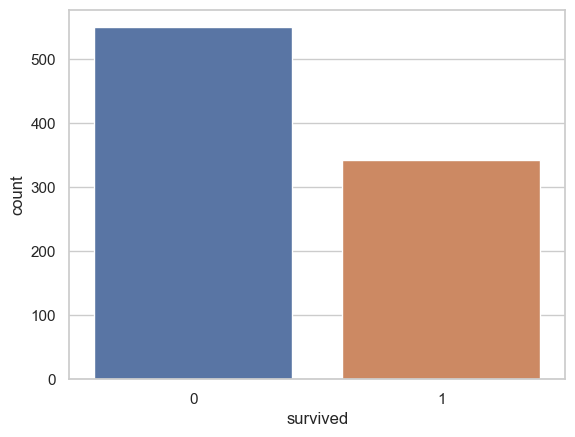

In [86]:
sns.countplot(x='survived', data=data)

**Plotted survival count**

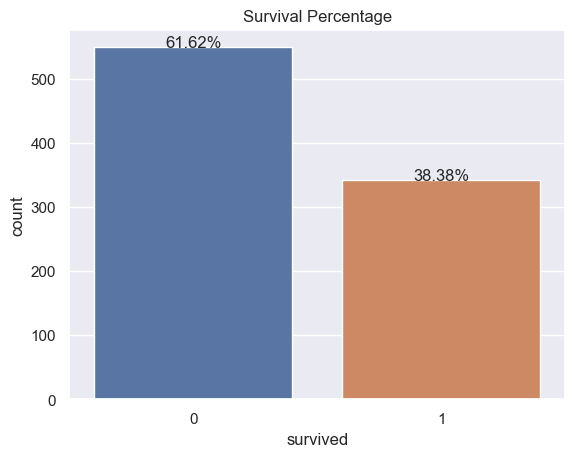

In [87]:
sns.set(style="darkgrid")  # Set the style if needed
countplot = sns.countplot(x='survived', data=data)
plt.title('Survival Percentage')

total = len(data)
for p in countplot.patches:
    height = p.get_height()
    countplot.text(p.get_x() + p.get_width() / 2., height, f'{100 * height / total:.2f}%', ha="center")

plt.show()

**Countplot for Survival data in Percentage**

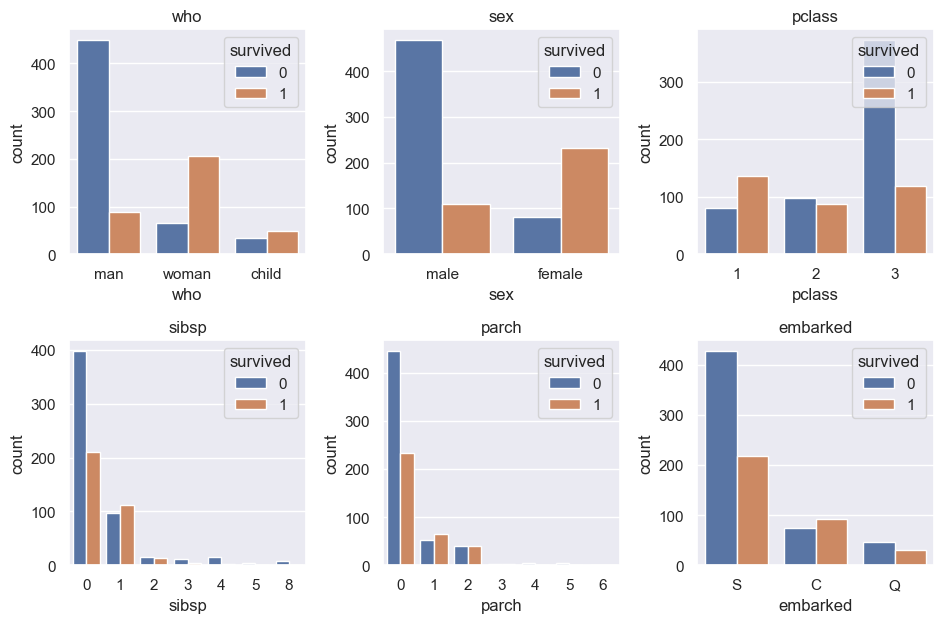

In [88]:
#visualize the count of survivors for columns 'who','sex','pclass','sibsp','parch','embarked'
cols = ['who','sex','pclass','sibsp','parch','embarked']

n_rows=2
n_cols=3
#the subplot grid and figure size of each graph
fig,axs=plt.subplots(n_rows,n_cols,figsize = (n_cols*3.2,n_rows*3.2))
subplot_bg_color = 'white'
for r in range(0,n_rows):
    for c in range(0,n_cols):

        i=r*n_cols + c
        ax=axs[r][c]
        sns.countplot(x=cols[i],data=data,hue='survived',ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived',loc='upper right')

plt.tight_layout()

Plotted survival counts for who, sex, pclass , sibsp , parch , embarked.

In [89]:
data.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


**Survival rate based on gender and class using a pivot table.**

In [90]:
#survival rate by sex,age and class
age=pd.cut(data['age'],[0,18,80])
data.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

**Survival rate based on gender, age, and class using a pivot table.**

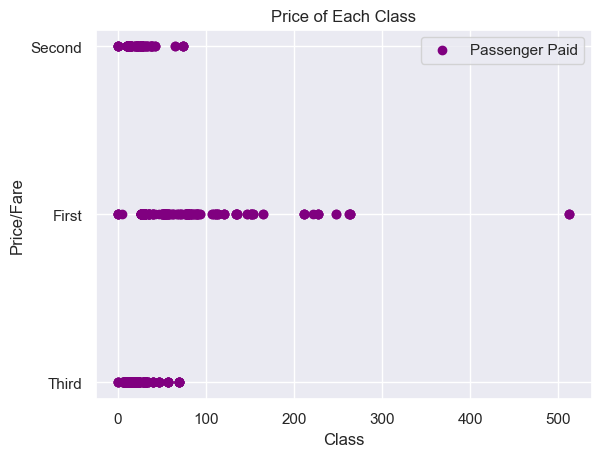

In [91]:
#prices paid of each class
plt.scatter(data['fare'],data['class'],color='purple',label='Passenger Paid')
plt.xlabel('Class')
plt.ylabel('Price/Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

**Scatter plot of Prices Paid for each Passenger class.**

In [92]:
#empty values in each column
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [93]:
# Counts and displays the unique values and their counts for each column.
for val in data:
    print(data[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [94]:
#drop the columns
data=data.drop(['deck','embark_town','alive','class','who','alone','adult_male'],axis=1)
#remove rows with missing values
data=data.dropna(subset=['embarked','age'])

In [95]:
#count the new rows and cols
data.shape

(712, 8)

In [96]:
data.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [97]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#encode the sex col
data.iloc[:,2] = labelencoder.fit_transform(data.iloc[:,2].values)
#encode the embarked col

data.iloc[:,7] = labelencoder.fit_transform(data.iloc[:,7].values)

C:\Users\shino\AppData\Local\Temp\ipykernel_9300\3157024746.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,2] = labelencoder.fit_transform(data.iloc[:,2].values)
C:\Users\shino\AppData\Local\Temp\ipykernel_9300\3157024746.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,7] = labelencoder.fit_transform(data.iloc[:,7].values)


**Utilizes LabelEncoder from scikit-learn to encode categorical data.**
**Encodes the 'sex' and 'embarked' columns in the dataset.**

In [98]:
#split the data into independent  'X and dependent 'Y' variables
X=data.iloc[:,1:8].values
Y=data.iloc[:,0].values

In [99]:
#split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

In [100]:
# Standardizes (scales) the training and testing data using StandardScaler from scikit-learn. This step helps normalize the features to have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [101]:
#create a function with ml models
def models(X_train,Y_train):
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)

    #Use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    Knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    Knn.fit(X_train,Y_train)

    #use SVC(linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #use SVC(RBF kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(X_train,Y_train)

    #use gaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,Y_train)

    #use decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,Y_train)

    #use random forest classifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)

    #print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy : ',log.score(X_train,Y_train))
    print('[1]K Neighbors Training Accuracy : ',Knn.score(X_train,Y_train))
    print('[2]SVC Linear Training Accuracy : ',svc_lin.score(X_train,Y_train))
    print('[3]SVC RBF Training Accuracy : ',svc_rbf.score(X_train,Y_train))
    print('[4]Gaussian NB Training Accuracy : ',gauss.score(X_train,Y_train))
    print('[5]Decision Tree Training Accuracy : ',tree.score(X_train,Y_train))
    print('[6]Random Forest Training Accuracy : ',forest.score(X_train,Y_train))
    
    return log,Knn,svc_lin,svc_rbf,gauss,tree,forest


**Creates, trains, and Evaluates Machine Learning models, returning model instances.**

In [102]:
#get and train all of the models
model=models(X_train,Y_train)

[0]Logistic Regression Training Accuracy :  0.7978910369068541
[1]K Neighbors Training Accuracy :  0.8664323374340949
[2]SVC Linear Training Accuracy :  0.7768014059753954
[3]SVC RBF Training Accuracy :  0.8506151142355008
[4]Gaussian NB Training Accuracy :  0.8031634446397188
[5]Decision Tree Training Accuracy :  0.9929701230228472
[6]Random Forest Training Accuracy :  0.9753954305799648


In [112]:
#Show the confusion matrix and accuracy for all of the models on the test data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm=confusion_matrix(Y_test,model[i].predict(X_test))

    #Extract TN,FP,FN,TP T=TRUE,F=FALSE,N=NEGATIVE,P=POSITIVE
    TN,FP,FN,TP=confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
    test_score=(TP+TN)/(TN+FP+FN+TP)
    print('Confusion Matrix for Model[{}]: '.format(i))
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i,test_score))
    print()

Confusion Matrix for Model[0]: 
[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

Confusion Matrix for Model[1]: 
[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

Confusion Matrix for Model[2]: 
[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

Confusion Matrix for Model[3]: 
[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

Confusion Matrix for Model[4]: 
[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

Confusion Matrix for Model[5]: 
[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

Confusion Matrix for Model[6]: 
[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



**Evaluates models with confusion matrices and testing accuracy.**

In [104]:
#get feature importance
forest=model[6]
importances=pd.DataFrame({'feature':data.iloc[:,1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


<AxesSubplot: xlabel='feature'>

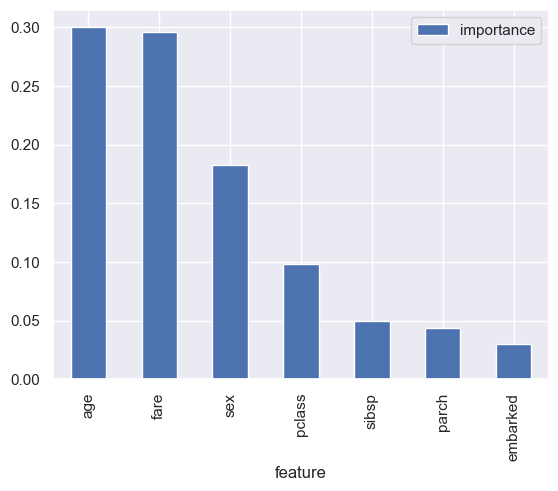

In [105]:
importances.plot.bar()

**Obtains feature importance using a Random Forest model, ranks them, and presents them** 

In [106]:
#print the prediction of the random forest classifier
pred=model[6].predict(X_test)
print(pred)

print()
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


**Predictions made by the Random Forest classifier for the test data and compares them to the actual values (Y_test).**

In [113]:
#Checking my survival
my_survival = [[3,1,21,0,0,0,1]]
# my_survival = [[1,0,20,8,6,200,0]]
#scaling my survival
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
fitted=sc.fit(X_train)
my_survival_scaled=fitted.transform(my_survival)
#print prediction of my survival using random forest classifier
pred=model[6].predict(my_survival_scaled)
print(pred)

if(pred)==0:
    print("Sorry! You didn't make it ")
else:
    print("Nice! You survived!")

[0]
Sorry! You didn't make it 


**Checks the survival prediction for a custom scenario (my_survival) using the trained Random Forest classifier**